# Sentiment Analysis of Reviews

This project performs sentiment analysis on a dataset of reviews using the VADER (Valence Aware Dictionary and Sentiment Reasoner) sentiment analysis tool from the Natural Language Toolkit (nltk). The script computes sentiment scores for each review and classifies them as Positive, Negative, or Neutral. Finally, it visualizes the distribution of these sentiment labels.


### Data Source

The dataset used in this project is sourced from a CSV file available at the following URL:
[https://raw.githubusercontent.com/amankharwal/Website-data/master/reviews%20data.csv](https://raw.githubusercontent.com/amankharwal/Website-data/master/reviews%20data.csv).

#### Overview

This dataset contains a collection of reviews, which are textual data points where users have expressed their opinions. Each row in the dataset represents a single review.

#### Structure

While the exact structure of the dataset can be confirmed by loading and examining the data, typically, such datasets contain columns like:
- **Review**: The text of the review, containing the opinion or feedback provided by a user.

#### Purpose

This dataset is used to perform sentiment analysis, which involves:
1. **Analyzing** the sentiment expressed in each review.
2. **Classifying** each review as Positive, Negative, or Neutral based on the sentiment scores computed using the VADER sentiment analysis tool.

#### Applications

Sentiment analysis on such datasets can be used in various applications, including:
- **Customer Feedback Analysis**: Understanding customer satisfaction and areas for improvement.
- **Market Research**: Gauging public opinion about products or services.
- **Social Media Monitoring**: Tracking brand sentiment on platforms like Twitter or Facebook.

In [1]:
# Import necessary libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

# Download the VADER lexicon
nltk.download("vader_lexicon")

# Load the dataset from the specified URL
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/reviews%20data.csv"
df = pd.read_csv(url)

# Drop any rows with missing values
df = df.dropna()

# Display the first few rows of the dataset
df.head(10)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review
0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso..."
5,love monaco staff husband stayed hotel crazy w...
6,"cozy stay rainy city, husband spent 7 nights m..."
7,"excellent staff, housekeeping quality hotel ch..."
8,"hotel stayed hotel monaco cruise, rooms genero..."
9,excellent stayed hotel monaco past w/e delight...


In [2]:
# Save the unlabelled dataset to a CSV file
df.to_csv('unlabelled_dataset.csv', index=False)

### **Initialize the Sentiment Analyzer**:
   - The `SentimentIntensityAnalyzer` from the VADER lexicon is initialized to analyze the sentiment of the text data.

In [3]:
# Initialize the Sentiment Analyzer
sentiments = SentimentIntensityAnalyzer()

###  **Compute Sentiment Scores Add Sentiment Scores to the Dataset**:
   - For each review in the dataset, the sentiment scores are computed. VADER provides four different scores. The computed sentiment scores for each review are added as new columns to the dataset.:
     - **Positive** (`pos`): The proportion of the text that conveys a positive sentiment.
     - **Negative** (`neg`): The proportion of the text that conveys a negative sentiment.
     - **Neutral** (`neu`): The proportion of the text that is neutral.
     - **Compound** (`compound`): A normalized, weighted composite score that aggregates the positive, negative, and neutral scores into a single metric ranging from -1 (extremely negative) to +1 (extremely positive).

In [4]:
# Compute sentiment scores for each review
df["Positive"] = [sentiments.polarity_scores(review)["pos"] for review in df["Review"]]
df["Negative"] = [sentiments.polarity_scores(review)["neg"] for review in df["Review"]]
df["Neutral"] = [sentiments.polarity_scores(review)["neu"] for review in df["Review"]]
df["Compound"] = [sentiments.polarity_scores(review)["compound"] for review in df["Review"]]

###  **Display the Updated Dataset**:
   - The script prints the first few rows of the updated dataset, now including the sentiment scores.

In [5]:
# Display the first 10 rows of the updated dataset
df.head(10)

,Review,Positive,Negative,Neutral,Compound
0,nice hotel expensive parking got good deal sta...,0.285,0.072,0.643,0.9747
1,ok nothing special charge diamond member hilto...,0.189,0.110,0.701,0.9787
2,nice rooms not 4* experience hotel monaco seat...,0.219,0.081,0.700,0.9889
3,"unique, great stay, wonderful time hotel monac...",0.385,0.060,0.555,0.9912
4,"great stay great stay, went seahawk game aweso...",0.221,0.135,0.643,0.9797
5,love monaco staff husband stayed hotel crazy w...,0.265,0.084,0.651,0.9870
6,"cozy stay rainy city, husband spent 7 nights m...",0.364,0.026,0.609,0.9925
7,"excellent staff, housekeeping quality hotel ch...",0.228,0.032,0.740,0.9590
8,"hotel stayed hotel monaco cruise, rooms genero...",0.298,0.038,0.663,0.9618
9,excellent stayed hotel monaco past w/e delight...,0.484,0.064,0.451,0.9756


## This part of the script assigns a sentiment label (Positive, Negative, or Neutral) to each review based on the compound sentiment score.

### **Extract Compound Scores**:
   - The compound scores from the dataset are extracted into a separate list for processing.

In [6]:
# Extract compound scores
scores = df["Compound"].values

### **Assign Sentiment Labels**:
   - For each compound score:
     - If the score is greater than or equal to 0.05, the sentiment is labeled as "Positive".
     - If the score is less than or equal to -0.05, the sentiment is labeled as "Negative".
     - If the score is between -0.05 and 0.05, the sentiment is labeled as "Neutral".

In [7]:
# Initialize a list to store sentiment labels
sentiment = []

# Assign sentiment labels based on the compound score
for score in scores:
    if score >= 0.05:
        sentiment.append('Positive')
    elif score <= -0.05:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')

### **Add Sentiment Labels to the Dataset**:
   - The sentiment labels are added as a new column in the dataset.

In [8]:
# Add sentiment labels to the dataset
df["Sentiment"] = sentiment



# Display the first few rows of the updated dataset
df.head()

,Review,Positive,Negative,Neutral,Compound,Sentiment
0,nice hotel expensive parking got good deal sta...,0.285,0.072,0.643,0.9747,Positive
1,ok nothing special charge diamond member hilto...,0.189,0.110,0.701,0.9787,Positive
2,nice rooms not 4* experience hotel monaco seat...,0.219,0.081,0.700,0.9889,Positive
3,"unique, great stay, wonderful time hotel monac...",0.385,0.060,0.555,0.9912,Positive
4,"great stay great stay, went seahawk game aweso...",0.221,0.135,0.643,0.9797,Positive


In [9]:
# Save the labelled dataset to a CSV file
df.to_csv('labelled_dataset.csv', index=False)


## Count and Visualize Sentiment Labels

Positive    18831
Negative     1569
Neutral        91
Name: Sentiment, dtype: int64


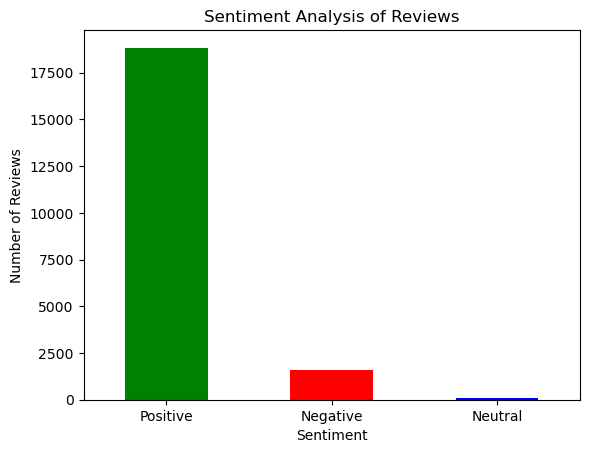

In [10]:
# Counts each sentiment category
Sentiment_counts = df["Sentiment"].value_counts()

# Print the counts
print(Sentiment_counts)

# Visualize the sentiment distribution
sentiment_counts = df["Sentiment"].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])

plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()